# Bank Churn - Prediction

 #  Problem Statement :
     A predictive analysis approach to predict, if a customer is going to churn or not using various Machine Learning                Algorithm.



# Details about the dataset:
   It consists of 10000 observations and 14 variables. Independent variables contain information about customers. Dependent  
   variable refers to customer abandonment status.

Variables:

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [6]:
# Importing data set
df = pd.read_csv('churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Inspecting the Dataframe
# Let's see the head of our dataset - Top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Let's see the tail of our dataset 
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
# Let's check the dimensions of the dataframe
df.shape

(10000, 14)

In [10]:
#checking whether dataset having any duplicated values
df.duplicated().sum()

0

In [11]:
# checking the null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# let's look at the statistical aspects of the dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Let's see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
# dropping unwanted variables
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Visualization

In [17]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# checking the column names
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# Analysis in Gender

In [19]:
# Taking the count of male and female
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: >

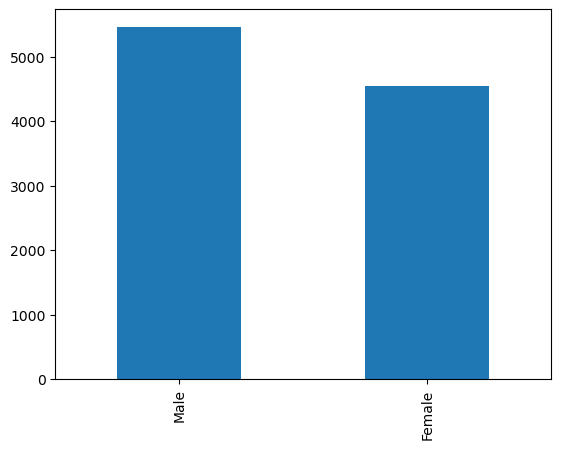

In [20]:
# visualization of gender
df["Gender"].value_counts().plot.bar()

In [21]:
# groupby gender with aggregation in target variable
df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [22]:
# converting groupby gender to percentage
group=df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)
group

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

In [23]:
# Renaming as percentage
grouped_df = group.rename('Percentage').reset_index()
grouped_df

,Gender,Exited,Percentage
0,Female,0,74.928461
1,Female,1,25.071539
2,Male,0,83.544072
3,Male,1,16.455928


<Axes: xlabel='Gender', ylabel='Percentage'>

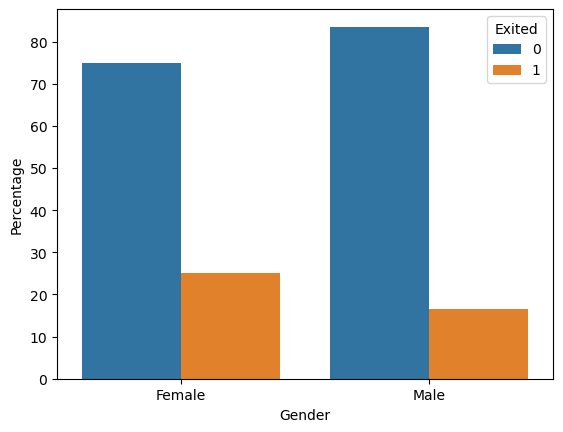

In [24]:
# visualization of gender V/S percentage
sns.barplot(x='Gender', y='Percentage', hue='Exited', data=grouped_df)

# Geography

<Axes: >

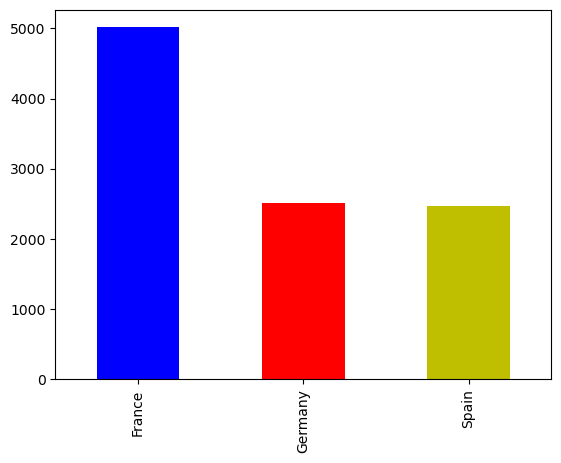

In [25]:
# counting the number of people in country
df["Geography"].value_counts().plot.bar(color=['b','r','y'])

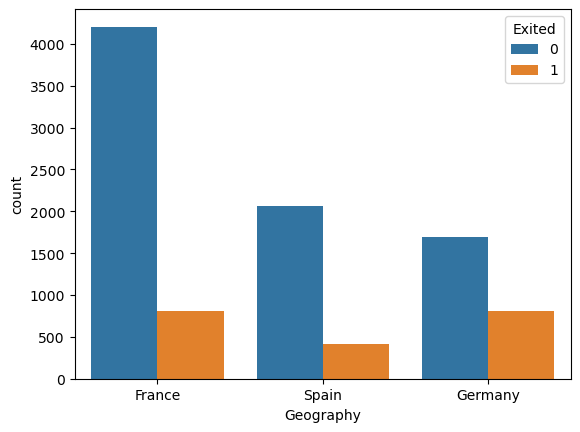

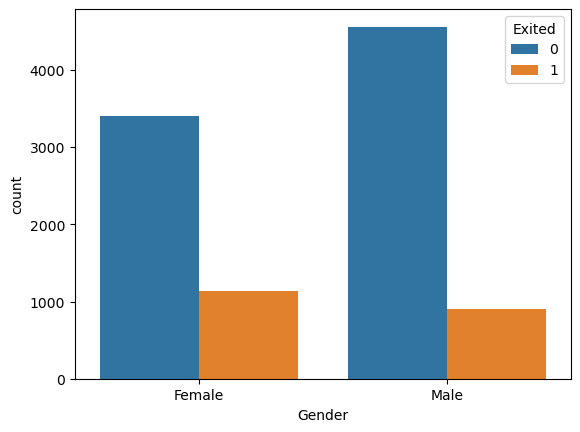

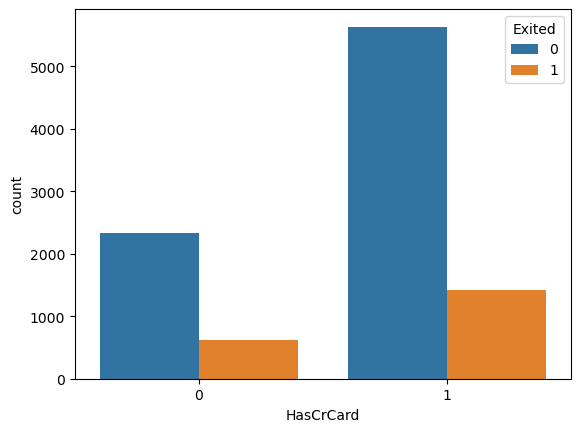

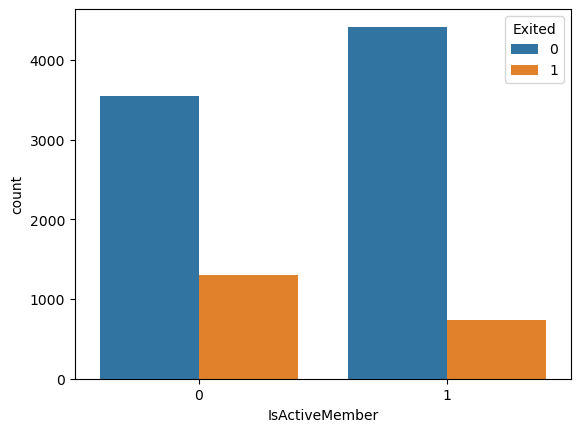

In [26]:
 # Shows the Distribution of Exited with respect to categorical variables

categorical = ['Geography','Gender','HasCrCard','IsActiveMember']

for i in categorical:
    sns.countplot(x=df[i],data=df, hue = df['Exited'])
    plt.show()

In [ ]:
# Shows the Distribution of Exited with respect to continuous variables
continuous = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

for i in continuous:
    sns.boxplot(x = df['Exited'], y = df[i])
    plt.show()

In [ ]:
# Histogram
df.hist(figsize=(12,12))

# co-relation plot

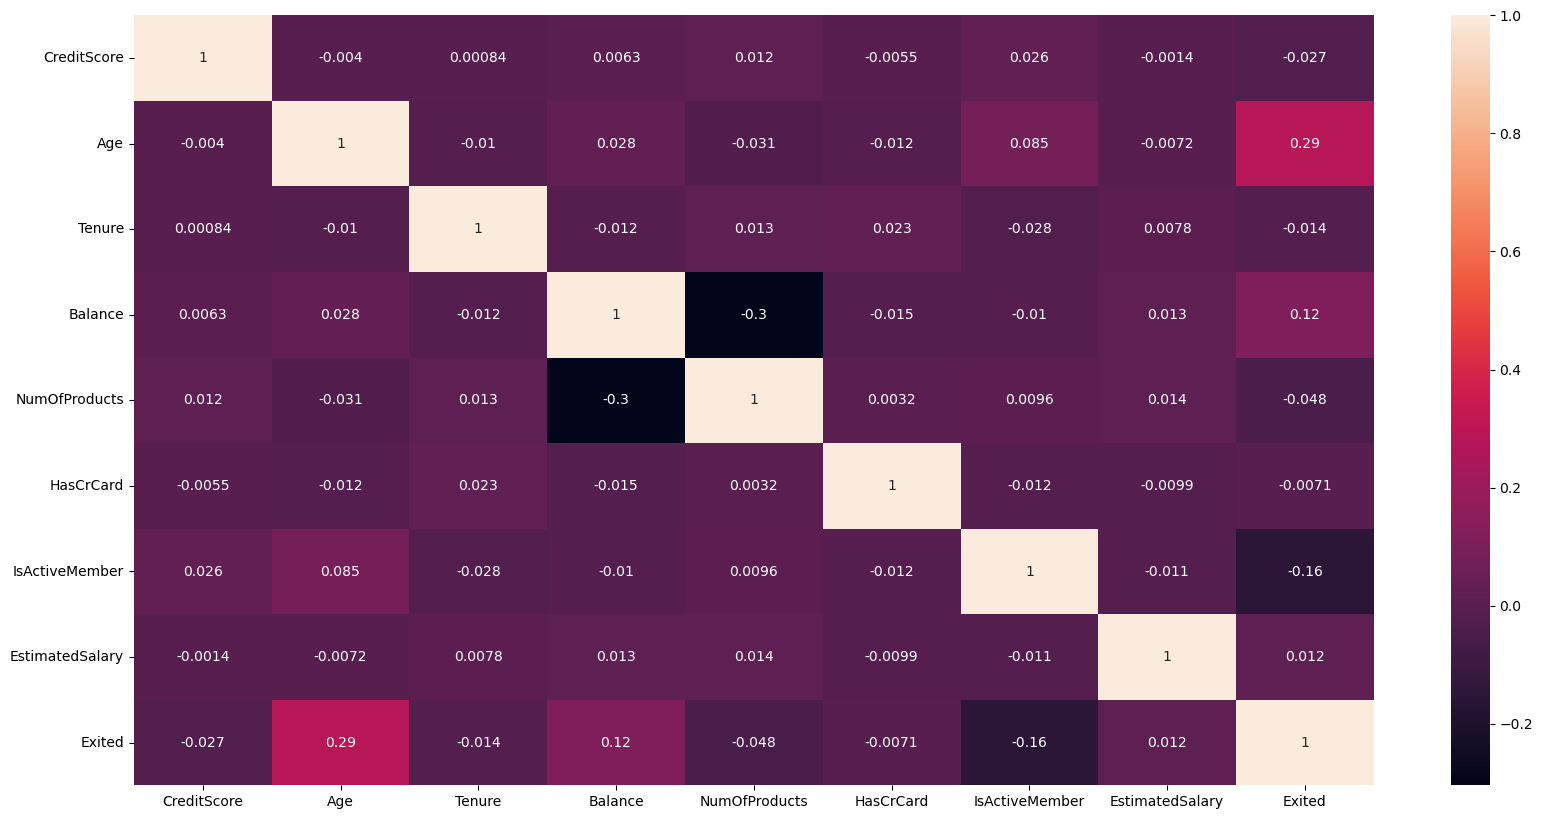

In [27]:
# correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

# Data Preprocessing

In [28]:
# Checking for NULL values in the data
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Checking the datatypes of variables
df.info()

In [29]:
# Checking the statistical information
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Geography','Gender']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1,1,0,1


In [32]:
# checking the dataset after dummification
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0


# dropping the repeated variable

In [33]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Geography','Gender'], 1)

In [34]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,1,0,1


In [35]:
# checking the dataset
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0


# Test Train Split

In [36]:
# Importing train_test split
from sklearn.model_selection import train_test_split

In [37]:
# Putting feature variable to X
X = df.drop(['Exited'], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [38]:
# Putting response variable to y
y = df['Exited']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 14), (3000, 14), (7000,), (3000,))

In [41]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [42]:
#Normalization in training dataset
scaler = MinMaxScaler()

X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
1191,0.577154,0.121622,0.3,0.632566,0.000000,0,1,0.426074,1,0,1,1,0,1
4458,0.565130,0.256757,0.2,0.000000,0.333333,1,0,0.911419,0,0,1,0,0,1
1131,0.298597,0.256757,0.9,0.527805,0.000000,1,0,0.558546,0,1,1,0,1,1
9562,0.775551,0.283784,0.5,0.000000,0.333333,1,1,0.572004,0,0,1,0,0,1
6579,0.290581,0.243243,0.7,0.000000,0.333333,0,0,0.540544,0,0,0,0,0,0


In [43]:
# checking testing dataset
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
8018,632,23,3,122478.51,1,1,0,147230.77,1,0,1,1,0,1
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0,1,0,0
3854,687,33,9,135962.40,2,1,0,121747.96,1,0,1,1,0,1
2029,520,33,4,156297.58,2,1,1,166102.61,0,0,1,0,0,1
3539,667,42,6,0.00,1,1,0,88890.05,0,0,1,0,0,1


In [45]:
#Normalization of testing dataset

X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
8018,0.564,0.078125,0.3,0.488160,0.000000,1,0,0.736063,1,0,1,1,0,1
9225,0.488,0.218750,0.4,0.478581,0.333333,1,1,0.814756,1,0,0,1,0,0
3854,0.674,0.234375,0.9,0.541903,0.333333,1,0,0.608586,1,0,1,1,0,1
2029,0.340,0.234375,0.4,0.622952,0.333333,1,1,0.830468,0,0,1,0,0,1
3539,0.634,0.375000,0.6,0.000000,0.000000,1,0,0.444217,0,0,1,0,0,1


## Model Building

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [ ]:
# Importing accuracy score
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, y_pred_logreg)


NameError: name 'accuracy_score' is not defined

In [51]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [52]:
# Confusion Matrix
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[2250,  126],
       [ 448,  176]], dtype=int64)

<Axes: >

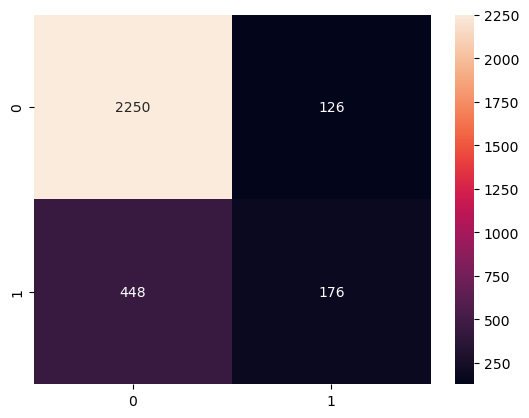

In [53]:
# visualization of Confusion Matrix
sns.heatmap(logistic_confusion_matrix,annot=True,fmt=".0f")





In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2250  126]
 [ 448  176]]
Accuracy: [0.80866667]
Sensitivity : [0.83395107]
Specificity : [0.58278146]
Precision: [0.9469697]
Recall: [0.83395107]
F-score: [0.88687426]
AUC: 0.6145104895104895
ROC curve:


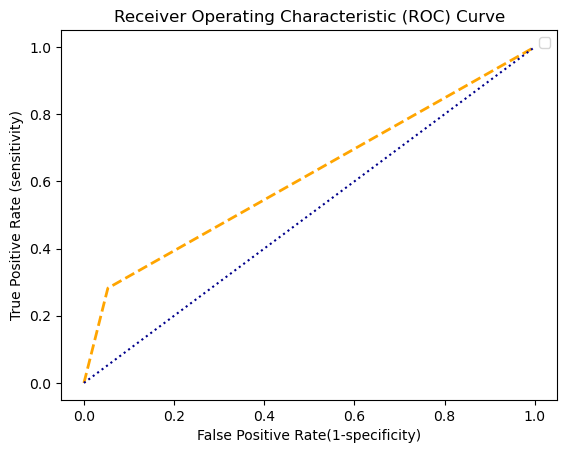

In [56]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine

In [57]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography_Germany,Geography_Spain,Gender_Male
1191,0.577154,0.121622,0.3,0.632566,0.000000,0,1,0.426074,1,0,1,1,0,1
4458,0.565130,0.256757,0.2,0.000000,0.333333,1,0,0.911419,0,0,1,0,0,1
1131,0.298597,0.256757,0.9,0.527805,0.000000,1,0,0.558546,0,1,1,0,1,1
9562,0.775551,0.283784,0.5,0.000000,0.333333,1,1,0.572004,0,0,1,0,0,1
6579,0.290581,0.243243,0.7,0.000000,0.333333,0,0,0.540544,0,0,0,0,0,0


In [58]:
y_train.head()

1191    0
4458    0
1131    0
9562    0
6579    0
Name: Exited, dtype: int64

In [59]:
# Importing SVM
from sklearn.svm import SVC

In [60]:
svc = SVC()

In [61]:
# Fitting the model
svc.fit(X_train, y_train)

SVC()

In [62]:
y_pred_svc = svc.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_svc)


NameError: name 'accuracy_score' is not defined

In [64]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[2347,   29],
       [ 460,  164]], dtype=int64)

<Axes: >

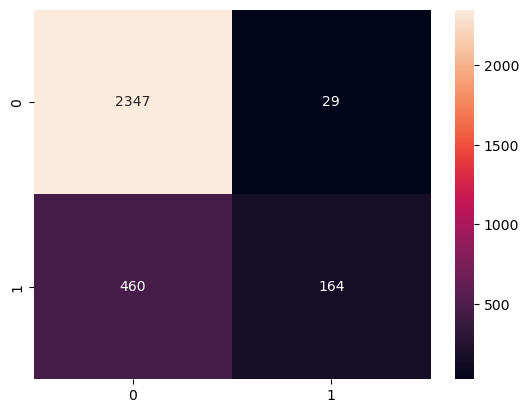

In [65]:
sns.heatmap(SVM_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2347   29]
 [ 460  164]]
Accuracy: [0.837]
Sensitivity : [0.83612398]
Specificity : [0.84974093]
Precision: [0.98779461]
Recall: [0.83612398]
F-score: [0.9056531]
AUC: 0.6253075628075627
ROC curve:


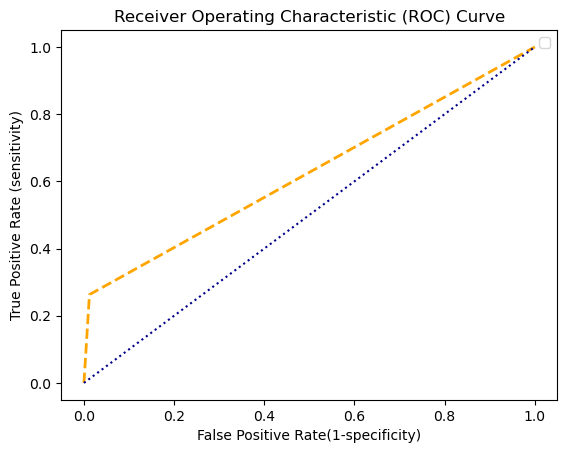

In [66]:
get_summary(y_test, y_pred_svc)

# Naive Bayes Classification

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
gnb = GaussianNB()

In [69]:
gnb.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred_gnb = gnb.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred_gnb)

NameError: name 'accuracy_score' is not defined

In [72]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[2075,  301],
       [ 333,  291]], dtype=int64)

<Axes: >

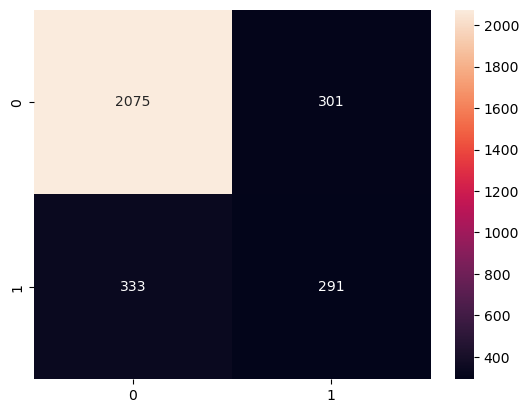

In [73]:
sns.heatmap(gnb_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2075  301]
 [ 333  291]]
Accuracy: [0.78866667]
Sensitivity : [0.86171096]
Specificity : [0.49155405]
Precision: [0.8733165]
Recall: [0.86171096]
F-score: [0.86747492]
AUC: 0.669831326081326
ROC curve:


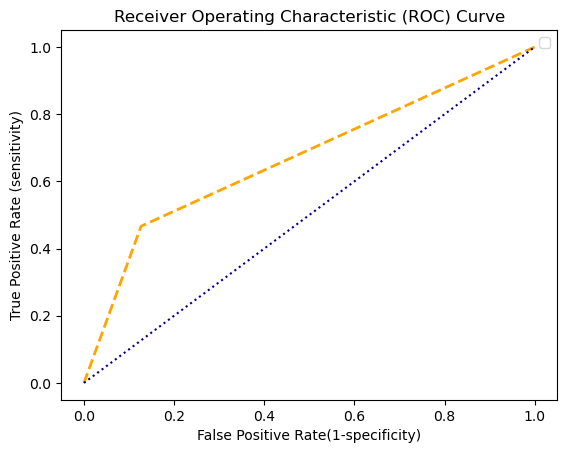

In [74]:
get_summary(y_test, y_pred_gnb)

# K Nearest Neighbour

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = knn.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred_knn)

NameError: name 'accuracy_score' is not defined

In [80]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[2251,  125],
       [ 410,  214]], dtype=int64)

<Axes: >

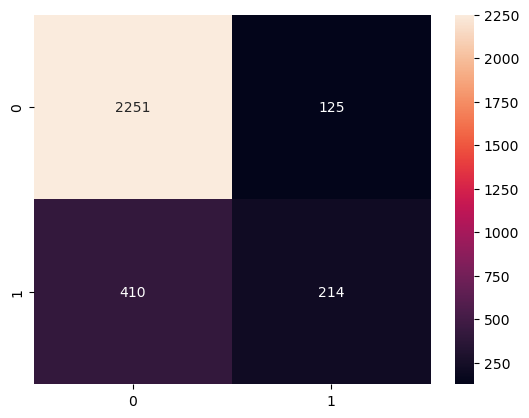

In [81]:
sns.heatmap(knn_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2251  125]
 [ 410  214]]
Accuracy: [0.82166667]
Sensitivity : [0.84592259]
Specificity : [0.63126844]
Precision: [0.94739057]
Recall: [0.84592259]
F-score: [0.89378598]
AUC: 0.6451696451696453
ROC curve:


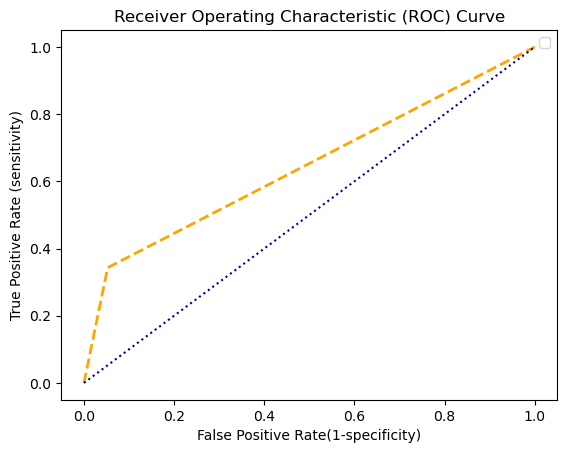

In [82]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dtree = dtree.predict(X_test)


In [87]:
accuracy_score(y_test, y_pred_dtree)

NameError: name 'accuracy_score' is not defined

In [88]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[1990,  386],
       [ 267,  357]], dtype=int64)

<Axes: >

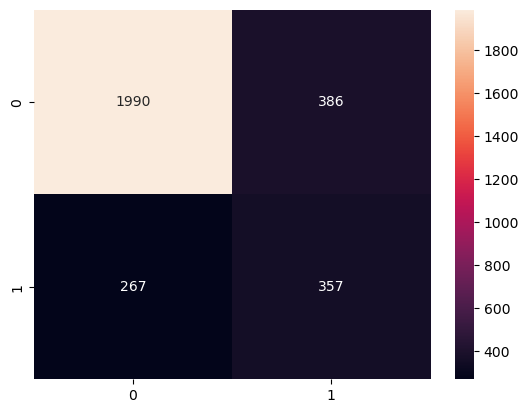

In [89]:
sns.heatmap(dtree_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1990  386]
 [ 267  357]]
Accuracy: [0.78233333]
Sensitivity : [0.88170137]
Specificity : [0.48048452]
Precision: [0.83754209]
Recall: [0.88170137]
F-score: [0.85905461]
AUC: 0.7048287360787361
ROC curve:


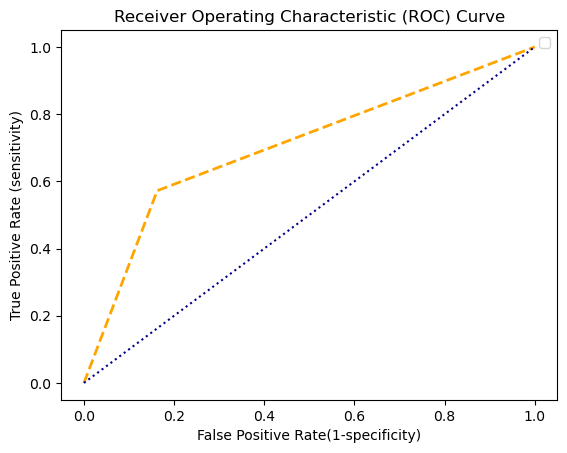

In [90]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()

In [93]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_rfc = rfc.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_rfc)

NameError: name 'accuracy_score' is not defined

In [96]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[2248,  128],
       [ 305,  319]], dtype=int64)

<Axes: >

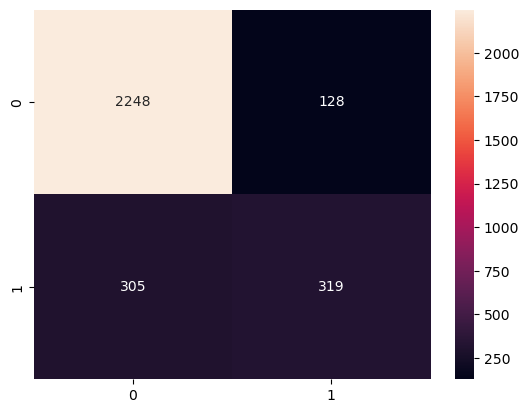

In [97]:
sns.heatmap(RandomForest_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2248  128]
 [ 305  319]]
Accuracy: [0.85566667]
Sensitivity : [0.88053271]
Specificity : [0.71364653]
Precision: [0.94612795]
Recall: [0.88053271]
F-score: [0.91215257]
AUC: 0.7286729474229474
ROC curve:


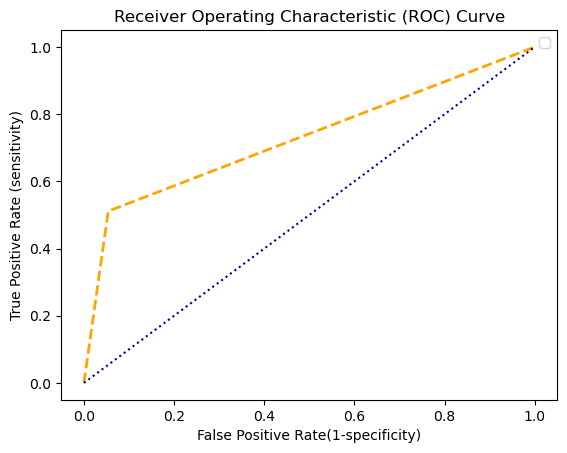

In [98]:
get_summary(y_test, y_pred_rfc)


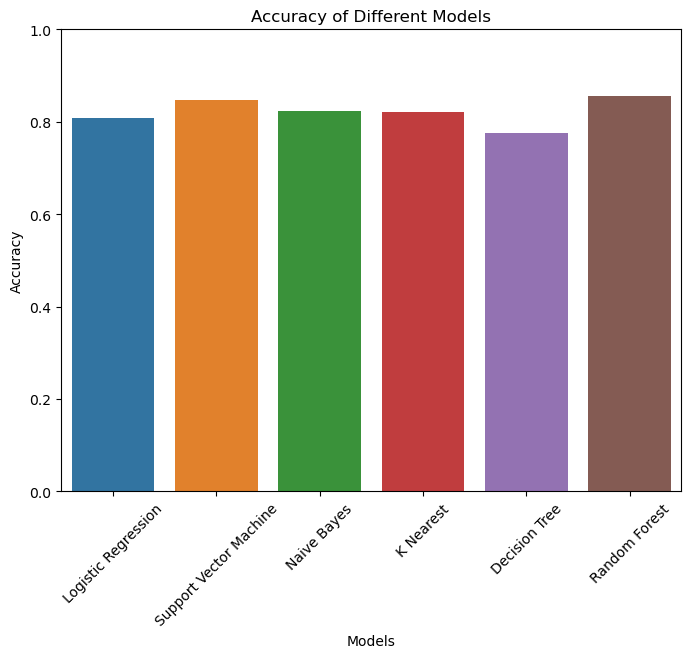

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "K Nearest", "Decision Tree", "Random Forest"]
accuracies = [0.8086666666666666, 0.847, 0.824, 0.8216666666666667, 0.776, 0.8556666666666667]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0) 
plt.xticks(rotation=45)
plt.show()





During Model Building; Logistic Regression, KNN, SVM, Random Forest,Naive Bayes,Decision Tree like using machine learning models Accuracy Score were calculated. Result; The model Random Forest became the model with the maxium Accuracy Score. (0.8556666)